In [1]:
import sys
import os
build_path = os.path.join(os.getcwd(), "..", "build")
!cmake -B {build_path} -DPYTHON_EXECUTABLE={sys.executable} -Wno-dev ..
!cmake --build {build_path}
if build_path not in sys.path:
    sys.path.append(build_path)
import pypumila
# to reload pypumila, restart python kernel.
# importlib.reload(pypumila) <- does not work

-- Eigen3 found
-- SDL2 and SDL2TTF found
-- Fetching pybind11 source...
-- pybind11 v2.11.1 
-- Fetching BS::thread_pool source...
-- Fetching roboto font...
-- Configuring done (1.4s)
-- Generating done (0.0s)
-- Build files have been written to: /Users/kou/projects/pumila/build
[ 63%] Built target pumila
[ 81%] Built target pypumila
[100%] Built target pumila-play


In [2]:
os.chdir(build_path)
sim = pypumila.GameSim()
window = pypumila.Window(sim)

In [3]:
def print_sim():
    for row in reversed(sim.field.field):
        print("\t".join([str(int(p)) * (p != pypumila.none) for p in row]))
    print(f"score = {sim.score}")
    print(f"current = {sim.get_current_pair()}")
    print(f"next = {sim.next_pair}")
    print(f"next2 = {sim.next2_pair}")
print_sim()

					
					
					
					
					
					
					
					
					
					
					
					
					
score = 0
current = <PuyoPair bottom = 1, top = 4, x = 2, y = 12.000000, rot = 0>
next = <PuyoPair bottom = 2, top = 1, x = 2, y = 12.000000, rot = 0>
next2 = <PuyoPair bottom = 1, top = 3, x = 2, y = 12.000000, rot = 0>


In [4]:
model = pypumila.Pumila1(0.1, 0.1, 0.1)

In [5]:
import numpy as np

In [6]:
from tqdm.notebook import tqdm

In [7]:
import random

In [55]:
model = pypumila.Pumila1(0.01, 0.9, 0.001)
model_first = model.copy()
hist = []
scores = []
prev_step_score = 0
for e in tqdm(range(500)):
    sim = pypumila.GameSim()
    prev_step_score = 0
    for e2 in range(20):
        q = model.forward(sim)
        a = random.choices(list(range(22)), (np.array(q) + min(q)) / np.sum(np.array(q) + min(q)))[0]
        sim.put(pypumila.actions[a])
        t = -10 -10 * max([sim.field.put_target_y(x) for x in range(6)])
        while not sim.is_free_phase():
            sim.step()
            if sim.current_chain:
                t = sim.current_chain.chain_num * 100
        # t += (sim.score - prev_step_score)
        prev_step_score = sim.score
        # print_sim()
        hist.append(max(q))
        model.backward(sim, a, t)
    scores.append(sim.score)

  0%|          | 0/500 [00:00<?, ?it/s]

In [56]:
import matplotlib.pyplot as plt

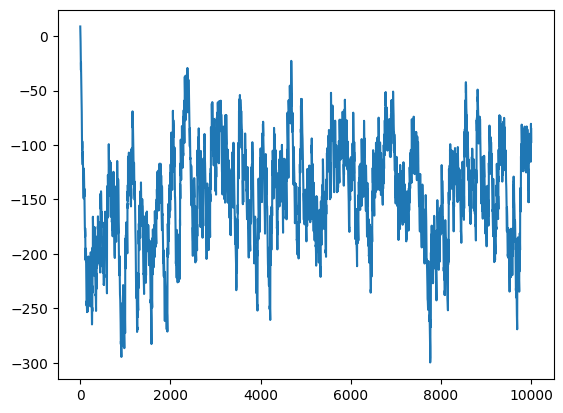

In [57]:
plt.plot(hist)

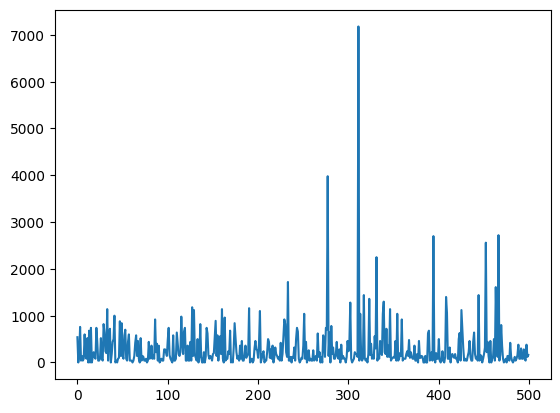

In [58]:
plt.plot(scores)

In [61]:
sim = pypumila.GameSim()
win = pypumila.Window(sim)
for e2 in range(50):
    q = model.forward(sim)
    #a = np.argmax(np.array(q))
    a = random.choices(list(range(22)), (np.array(q) + min(q)) / np.sum(np.array(q) + min(q)))[0]
    sim.put(pypumila.actions[a])
    while not sim.is_free_phase():
        # sim.step()
        win.step(True, False)
    for i in range(30):
        win.step(True, False)
    # print_sim()

In [60]:
win.quit()

In [62]:
sim = pypumila.GameSim()
win2 = pypumila.Window(sim)
for e2 in range(20):
    q = model_first.forward(sim)
    a = np.argmax(np.array(q))
    sim.put(pypumila.actions[a])
    while not sim.is_free_phase():
        # sim.step()
        win2.step(True, False)
    for i in range(30):
        win2.step(True, False)

In [39]:
win2.quit()